In [2]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

In [4]:
bot = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/boutique.csv")
bot.head()

,year,gender,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual
0,2020,woman,34.0,168,98,75.0,0,69.83,21,89,729.73
1,2020,man,28.0,168,88,76.0,0,61.39,7,32,621.73
2,2021,woman,18.0,170,95,75.0,0,80.55,2,25,820.82
3,2021,woman,43.0,167,97,75.0,0,82.98,4,89,880.33
4,2021,other,29.0,173,89,74.0,0,62.00,5,95,690.35


In [5]:
# check null
bot.isnull().sum()

year                         0
gender                       0
age                         20
height_cm                    0
waist_size_cm                0
inseam_cm                  200
test_group                   0
salary_self_report_in_k     15
months_active                0
num_purchases                0
amount_spent_annual          0
dtype: int64

In [6]:
# drop missing
bot.dropna(inplace = True)
bot.reset_index(inplace = True)

In [7]:
#set up variables
predictors = ["gender", "age", "height_cm", "waist_size_cm", "inseam_cm", "test_group", "salary_self_report_in_k", "months_active", "num_purchases","year"]
X = bot[predictors]
y = bot["amount_spent_annual"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [8]:
catpreds = ["gender", "test_group", "year"]
numpreds = ["age", "height_cm", "waist_size_cm", "inseam_cm", "salary_self_report_in_k", "months_active", "num_purchases"]




In [9]:
#Linear Regression
z = make_column_transformer((StandardScaler(), numpreds),
                            (OneHotEncoder(), catpreds),
                            remainder = "passthrough")


lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
#train
print("Train:")
print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))


#test
print("\nTest:")
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

Train:
MSE :  12969.115462779364
MAE :  89.95940668416708
MAPE:  0.1283856138134353
R2  :  0.5233990193909172

Test:
MSE :  13017.922047480562
MAE :  89.81418582721484
MAPE:  0.12703138582437146
R2  :  0.5159145315691644


In [10]:
#Polynomial Regression

z = make_column_transformer((StandardScaler(), numpreds),
                            (OneHotEncoder(), catpreds),
                            (PolynomialFeatures(degree = 2), numpreds),
                            remainder = "passthrough")


lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                 ("poly", PolynomialFeatures(degree = 2)),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
#train
print("Train:")
print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))


#test
print("\nTest:")
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

Train:
MSE :  2978.5653960162126
MAE :  43.478594631097046
MAPE:  0.05814789342595914
R2  :  0.8905409399257995

Test:
MSE :  3224.926447448768
MAE :  45.49040664072077
MAPE:  0.06051238228634035
R2  :  0.8800776326456522


## Does making more money (salary) tend to increase the number of purchases someone makes? Does it increase the total amount spent?   

-From the dot plot, we see that a higher x value (salary) generally corresponds to a higher y value (amount spent). This relationship is shown by the line of best fit that proves that on average, making more money results in a higher total amount spent.   
   

-However, there is no relationship between salary and number of purchases.   
   
-Therefore, we conclude that with a raise in salary, similar quantity, but higher quality (more expensive) items are bought

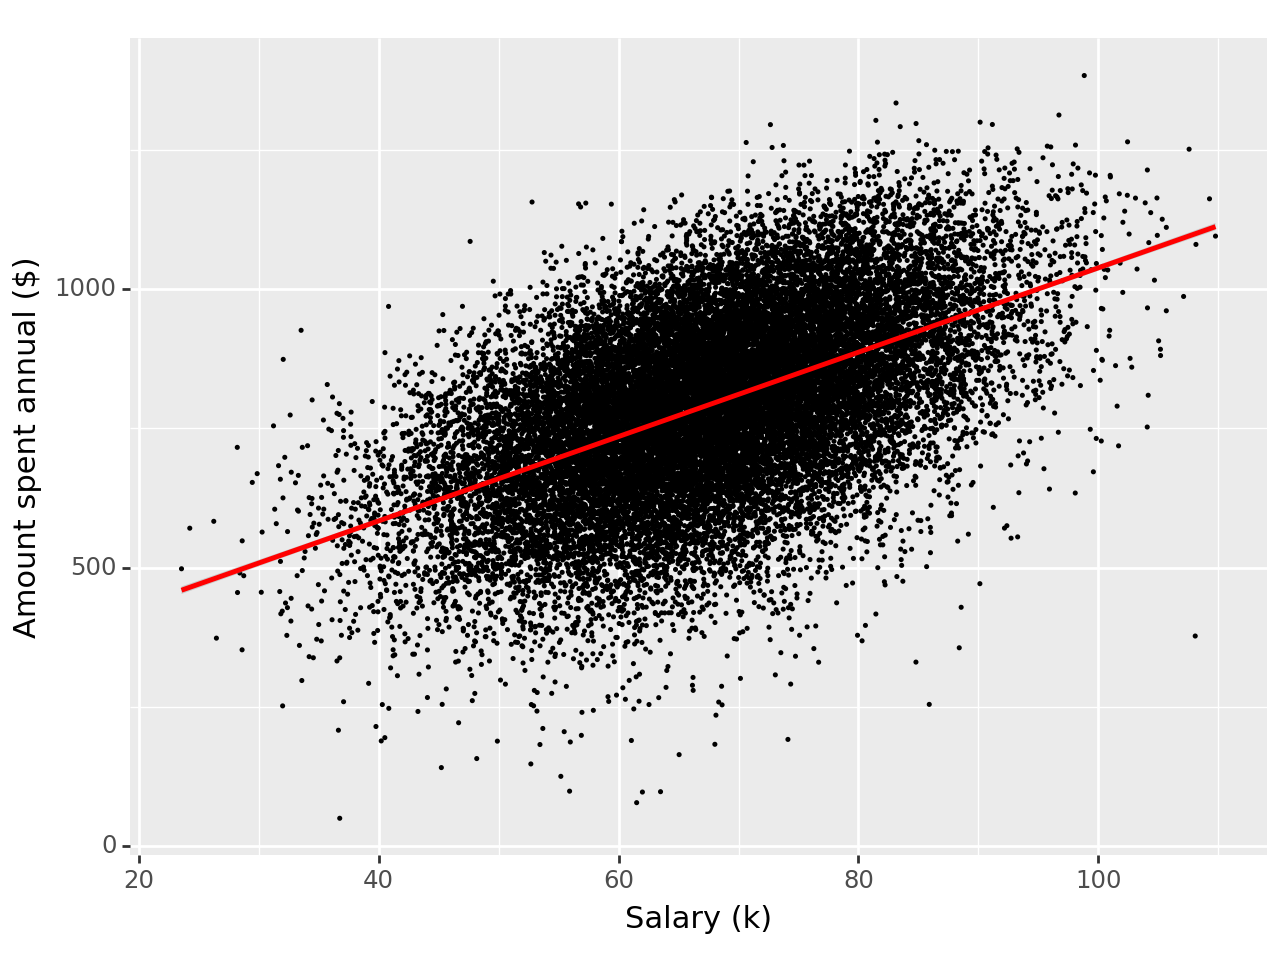

<Figure Size: (640 x 480)>

In [13]:
(ggplot(bot, aes(x = "salary_self_report_in_k", y = "amount_spent_annual")) +
geom_point(size = 0.03)+
geom_smooth(method = "lm", color = "red")+
  labs(x = "Salary (k)", y = "Amount spent annual ($)") )

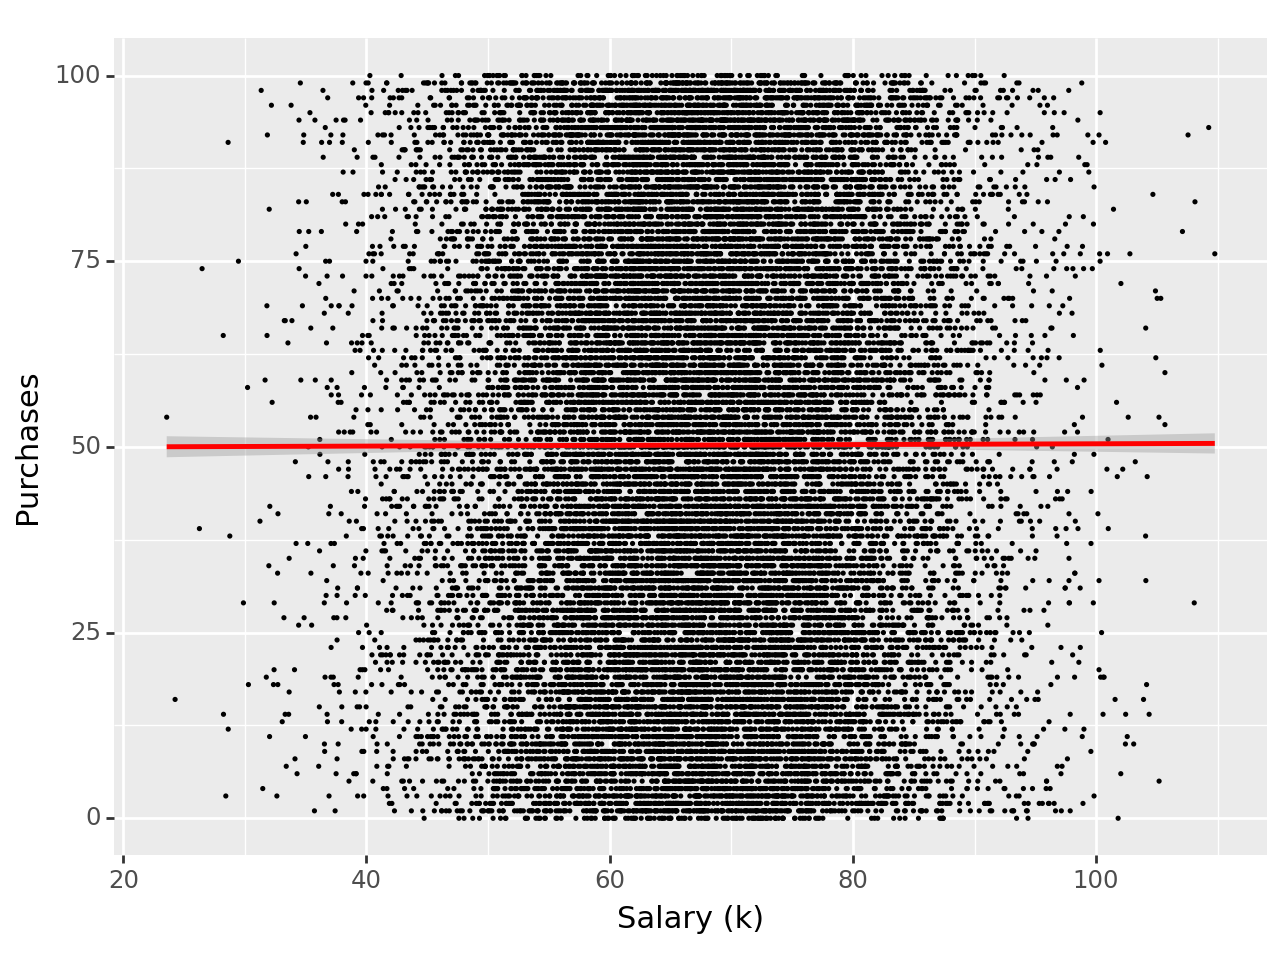

<Figure Size: (640 x 480)>

In [14]:
(ggplot(bot, aes(x = "salary_self_report_in_k", y = "num_purchases")) +
geom_point(size = 0.05)+
geom_smooth(method = "lm", color = "red")+
  labs(x = "Salary (k)", y = "Purchases") )

## In which year did the store's customers make the most money? Were the store's sales highest in those years?   

-2022   

-From 2019 to 2022, the total salary increased among customers each year. Likewise, each year, the total sales of the stores increased every year up to 2022.

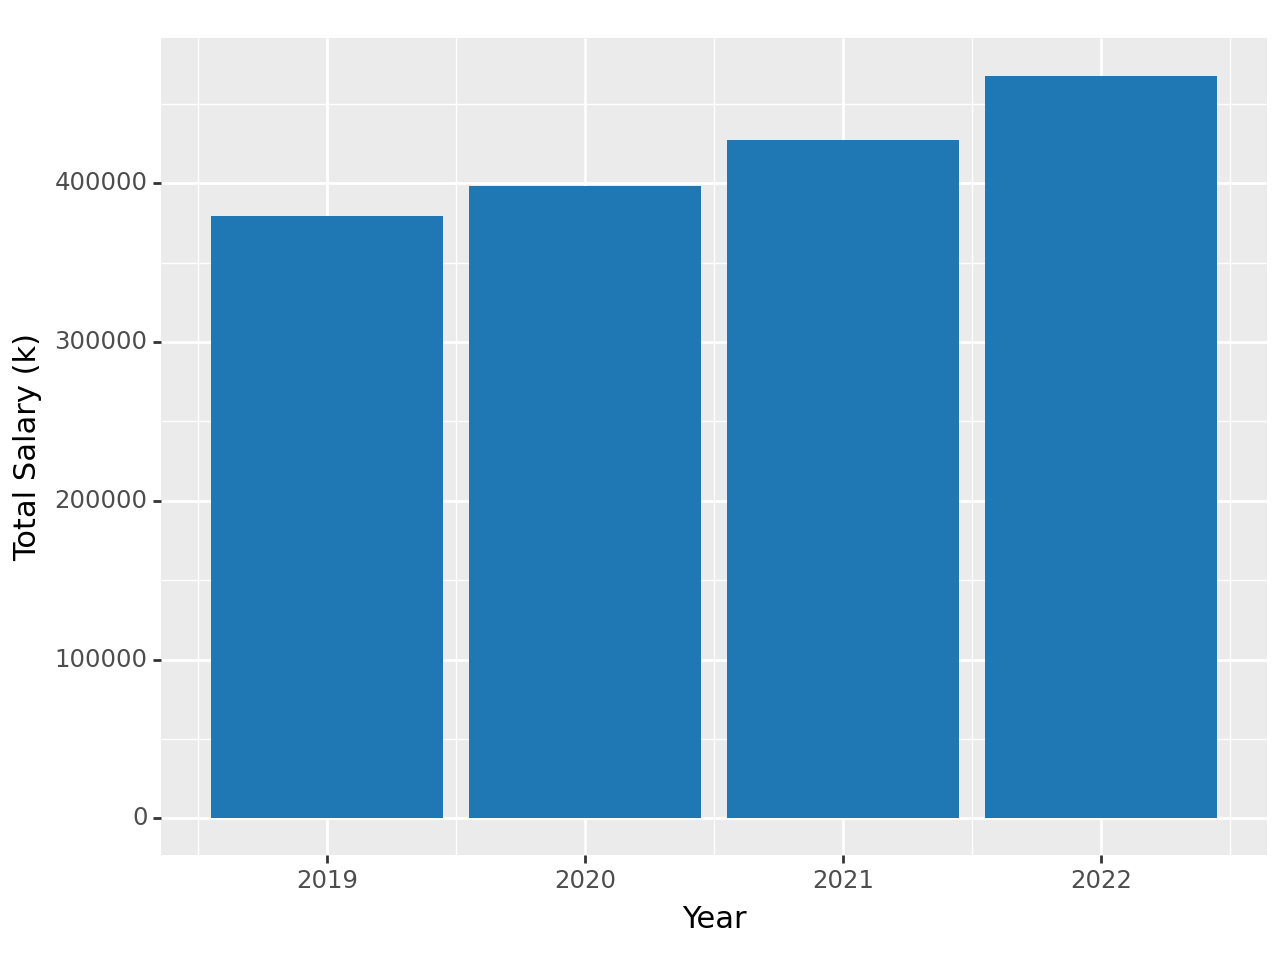

<Figure Size: (640 x 480)>

In [11]:

(ggplot(bot, aes(x = "year", y = "salary_self_report_in_k" )) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  labs(x = "Year", y = "Total Salary (k)") )

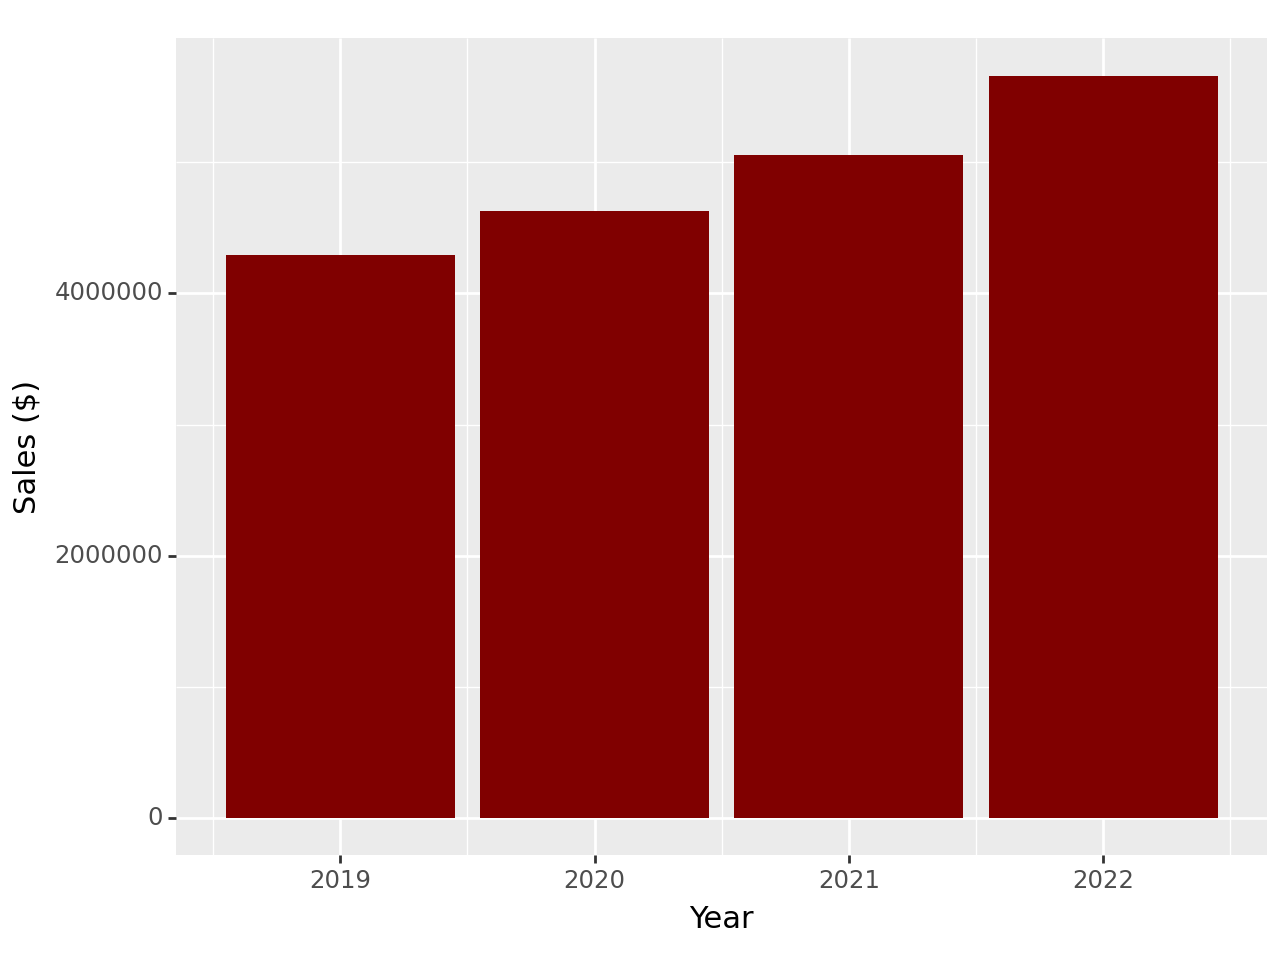

<Figure Size: (640 x 480)>

In [12]:
(ggplot(bot, aes(x = "year", y = "amount_spent_annual" )) +
  geom_bar(stat = "identity", fill = "#800000") +
  labs(x = "Year", y = "Sales ($)") )